In [1]:
#pip install mplsoccer

In [2]:
import pandas as pd
import requests 
import numpy as np
import matplotlib.pyplot as plt
from mplsoccer import VerticalPitch,Pitch

In [3]:
r = requests.get('https://raw.githubusercontent.com/statsbomb/open-data/master/data/events/16056.json').json()

I will be analyzing the game between FC Barcelona and Real Betis Sevilla from the 2018-2019 season. The data is from StatBomb and represents every event data of the game. 
The analysis will be about the following points:

- General stats of the game
- Location of the shots
- Preferential passes of players
- Passing Network


## Collection of Passes Data

Every pass has several caracteristical data such as starting coordinates, ending coordinates, length and angle. I will get this data for every pass. 

In [4]:
passes = []
shots = []
for i in range(len(r)):
    
    if r[i]['type']['name'] == 'Pass':
        passes.append(r[i])
    elif r[i]['type']['name'] == 'Shot':
        shots.append(r[i])
    

In [5]:
pass_df = pd.DataFrame()

players = []
recipients = []
coordinates_x = []
coordinates_y = []
end_x = []
end_y = []
lengths = []
angles = []
teams = []


for i in range(len(passes)):
    player = passes[i]['player']['name']
    x = passes[i]['location'][0]
    y = passes[i]['location'][1]
    endx = passes[i]['pass']['end_location'][0]
    endy = passes[i]['pass']['end_location'][1]
    l = passes[i]['pass']['length']
    angle = passes[i]['pass']['angle']
    team = passes[i]['team']['name']
    
    players.append(player)
    coordinates_x.append(x)
    coordinates_y.append(y)
    end_x.append(endx)
    end_y.append(endy)
    lengths.append(l)
    angles.append(angle)
    teams.append(team)
     
pass_df['player'] = players
pass_df['x'] = coordinates_x 
pass_df['y'] = coordinates_y
pass_df['end_x'] = end_x 
pass_df['end_y'] = end_y
pass_df['length'] = lengths
pass_df['angle'] = angles
pass_df['team'] = teams 
    

In [6]:
recipients = []

for i in range(len(passes)):
    
    if 'recipient' in passes[i]['pass'].keys():
        recipient = passes[i]['pass']['recipient']['name']
        
    else:
        recipient = 'No recipient'
        
    recipients.append(recipient)
pass_df['recipient'] = recipients

In [7]:
outcomes = []

for i in range(len(passes)):
    
    if 'outcome' in passes[i]['pass'].keys():
        outcome = 0
    
    else:
        outcome = 1
        
    outcomes.append(outcome)
pass_df['outcome'] = outcomes

In [8]:
pass_df

,player,x,y,end_x,end_y,length,angle,team,recipient,outcome
0,Luis Alberto Suárez Díaz,60.0,40.0,49.0,41.0,11.045361,3.050933,Barcelona,Sergio Busquets i Burgos,1
1,Sergio Busquets i Burgos,49.0,43.0,48.0,52.0,9.055386,1.681454,Barcelona,Ivan Rakitić,1
2,Ivan Rakitić,47.0,57.0,44.0,70.0,13.341664,1.797595,Barcelona,Sergi Roberto Carnicer,1
3,Sergi Roberto Carnicer,44.0,70.0,21.0,55.0,27.459060,-2.563691,Barcelona,Gerard Piqué Bernabéu,1
4,Gerard Piqué Bernabéu,28.0,54.0,27.0,23.0,31.016125,-1.603043,Barcelona,Clément Lenglet,1
...,...,...,...,...,...,...,...,...,...,...
987,Héctor Junior Firpo Adames,84.0,10.0,106.0,8.0,22.090721,-0.090660,Real Betis,Takashi Inui,0
988,Sergi Roberto Carnicer,30.0,73.0,28.0,67.0,6.324555,-1.892547,Barcelona,Arturo Erasmo Vidal Pardo,1
989,Arturo Erasmo Vidal Pardo,37.0,66.0,87.0,41.0,55.901700,-0.463648,Barcelona,Luis Alberto Suárez Díaz,1
990,Luis Alberto Suárez Díaz,87.0,41.0,83.0,33.0,8.944272,-2.034444,Barcelona,Gerard Piqué Bernabéu,1


## Collection of Shots data

Every shot has caracteristical data such as starting coordinates, ending coordinates and the outcome of the shot.

In [9]:
shots_df = pd.DataFrame()

players = []
teams = []
x = []
y = []
end_x = []
end_y = []
end_z = []
outcomes = []

for i in range(len(shots)):
    player = shots[i]['player']['name']
    team = shots[i]['team']['name']
    coor_x = shots[i]['location'][0]
    coor_y = shots[i]['location'][1]
    endx = shots[i]['shot']['end_location'][0]
    endy = shots[i]['shot']['end_location'][1]
    endz = shots[i]['shot']['end_location'][-1]
    outcome = shots[i]['shot']['outcome']['name']
    
    players.append(player)
    teams.append(team)
    x.append(coor_x)
    y.append(coor_y)
    end_x.append(endx)
    end_y.append(endy)
    end_z.append(endz)
    outcomes.append(outcome)

shots_df['player'] = players 
shots_df['team'] = teams
shots_df['x'] = x
shots_df['y'] = y
shots_df['end_x'] = end_x
shots_df['end_y'] = end_y
shots_df['end_z'] = end_z
shots_df['outcome'] = outcomes

In [10]:
shots_df.head()

,player,team,x,y,end_x,end_y,end_z,outcome
0,Lionel Andrés Messi Cuccittini,Barcelona,113.0,33.8,107.7,77.8,77.8,Wayward
1,Sergio Busquets i Burgos,Barcelona,100.7,36.6,120.0,30.8,3.1,Off T
2,Luis Alberto Suárez Díaz,Barcelona,104.3,32.5,107.4,33.3,33.3,Blocked
3,Lorenzo Jesús Morón García,Real Betis,117.4,30.6,120.0,32.0,0.2,Off T
4,Malcom Filipe Silva de Oliveira,Barcelona,106.7,20.1,120.0,33.4,2.4,Off T


## Details of the Game

### Starting Lineups

In [11]:
barca_tactics = r[0]['tactics']
betis_tactics = r[1]['tactics']

fcb = []
bts = []

for i in range(len(barca_tactics['lineup'])):
    barca_players = {}
    betis_players = {}
    
    barca_players['player'] = barca_tactics['lineup'][i]['player']['name']
    barca_players['position'] = barca_tactics['lineup'][i]['position']['name']
    barca_players['jersey_number'] = barca_tactics['lineup'][i]['jersey_number']
    fcb.append(barca_players)
    
    betis_players['player'] = betis_tactics['lineup'][i]['player']['name']
    betis_players['position'] = betis_tactics['lineup'][i]['position']['name']
    betis_players['jersey_number'] = betis_tactics['lineup'][i]['jersey_number']
    bts.append(betis_players)
    
barca_lineup = pd.DataFrame.from_records(fcb)
betis_lineup = pd.DataFrame.from_records(bts)

In [12]:
display(barca_lineup)
display(betis_lineup)

,player,position,jersey_number
0,Marc-André ter Stegen,Goalkeeper,1
1,Sergi Roberto Carnicer,Right Back,20
2,Gerard Piqué Bernabéu,Right Center Back,3
3,Clément Lenglet,Left Center Back,15
4,Jordi Alba Ramos,Left Back,18
5,Sergio Busquets i Burgos,Center Defensive Midfield,5
6,Ivan Rakitić,Right Center Midfield,4
7,Arthur Henrique Ramos de Oliveira Melo,Left Center Midfield,8
8,Lionel Andrés Messi Cuccittini,Right Wing,10
9,Malcom Filipe Silva de Oliveira,Left Wing,14


,player,position,jersey_number
0,Pau López Sabata,Goalkeeper,13
1,Aïssa Mandi,Right Center Back,23
2,Marc Bartra Aregall,Center Back,5
3,Sidnei Rechel da Silva Júnior,Left Center Back,12
4,Cristian Tello Herrera,Right Wing Back,11
5,Héctor Junior Firpo Adames,Left Wing Back,20
6,José Andrés Guardado Hernández,Right Center Midfield,18
7,William Silva de Carvalho,Left Center Midfield,14
8,Giovani Lo Celso,Center Attacking Midfield,21
9,Lorenzo Jesús Morón García,Right Center Forward,16


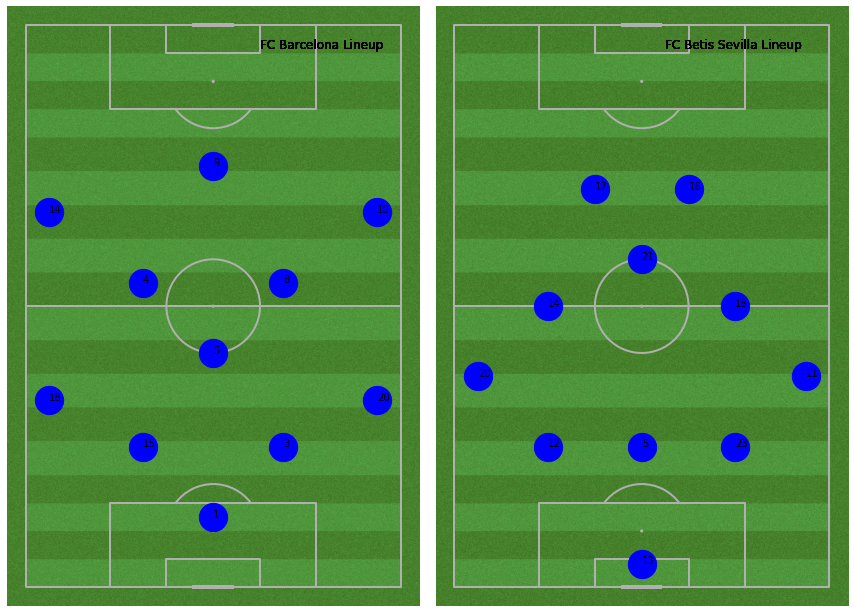

In [13]:
x_barca = [40,75,55,25,5,40,25,55,75,5,40]
y_barca = [15, 40, 30, 30, 40, 50, 65, 65, 80, 80, 90]

x_betis = [40,60,40,20,75,5,60,20,40,50,30]
y_betis = [5, 30, 30, 30, 45, 45, 60, 60, 70, 85, 85]

pitch = VerticalPitch(pitch_color='grass', stripe=True)
fig, axs = pitch.draw(figsize=(12,10),nrows=1, ncols=2)

for i in range(11):
    axs[0].scatter(x_barca[i], y_barca[i], c='b', s=800)
    axs[0].text(x_barca[i], y_barca[i],barca_lineup['jersey_number'][i])
    axs[0].annotate("FC Barcelona Lineup",(50,115),fontsize=12)
    
    axs[1].scatter(x_betis[i], y_betis[i], c='b', s=800)
    axs[1].text(x_betis[i], y_betis[i],betis_lineup['jersey_number'][i])
    axs[1].annotate("FC Betis Sevilla Lineup",(45,115),fontsize=12)

fig.show()

### Game Stats

In [14]:
fouls = []
for i in range(len(r)):
    if r[i]['type']['name'] == 'Foul Committed':
        f = r[i]['possession_team']['name']
        fouls.append(f)

In [15]:
game_stats = pd.DataFrame(index=[pass_df['team'].unique()])
game_stats['Goals'] = shots_df[shots_df['outcome'] == 'Goal'].groupby('team')['outcome'].count().values
game_stats['Shots'] = shots_df.groupby('team')['outcome'].count().values
game_stats['Scorer'] = [shots_df[(shots_df['outcome'] == 'Goal') & (shots_df['team'] == 'Barcelona')]['player'].values,
 shots_df[(shots_df['outcome'] == 'Goal') & (shots_df['team'] == 'Real Betis')]['player'].values]
game_stats['Shots_on_target'] = shots_df[(shots_df['outcome'] == 'Goal') | 
                                         (shots_df['outcome'] == 'Saved')].groupby('team')['outcome'].count().values
game_stats['Passes_completed'] = pass_df.groupby('team')['outcome'].count().values
game_stats['% Passes_completed'] = round(pass_df[pass_df['outcome'] == 1].groupby('team')['outcome'].count() / 
                                         (pass_df.groupby('team')['outcome'].count()) * 100,2).values
game_stats['Fouls_Committed'] = [15,11]

In [16]:
game_stats

,Goals,Shots,Scorer,Shots_on_target,Passes_completed,% Passes_completed,Fouls_Committed
Barcelona,3,20,"[Lionel Andrés Messi Cuccittini, Arturo Erasmo...",5,553,83.91,15
Real Betis,4,15,"[Héctor Junior Firpo Adames, Joaquín Sánchez R...",8,439,84.05,11


### Shots location

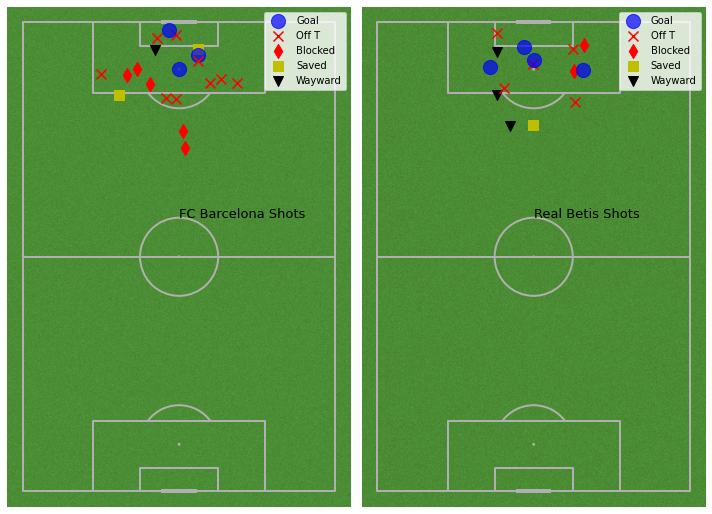

In [17]:
import seaborn as sns
pitch = VerticalPitch(pitch_color='grass')
fig, axs = pitch.draw(figsize=(10,15), nrows=1, ncols=2)

barca_shots = shots_df[shots_df['team'] == 'Barcelona'].reset_index()
betis_shots = shots_df[shots_df['team'] == 'Real Betis'].reset_index()

for i in range(len(barca_shots)):
    if barca_shots['outcome'][i] == 'Goal':
        goal = axs[0].scatter(barca_shots['y'][i], barca_shots['x'][i], c='b', s=200, alpha=0.7)
    elif barca_shots['outcome'][i] == 'Off T':
        ott_t = axs[0].scatter(barca_shots['y'][i], barca_shots['x'][i], c='r', s=100, marker ='x') 
    elif barca_shots['outcome'][i] == 'Blocked':
        blocked = axs[0].scatter(barca_shots['y'][i], barca_shots['x'][i], c='r', s=100, marker ='d')
    elif barca_shots['outcome'][i] == 'Saved':
        saved = axs[0].scatter(barca_shots['y'][i], barca_shots['x'][i], c='y', s=100, marker ='s')
    else:
        wayward = axs[0].scatter(barca_shots['y'][i], barca_shots['x'][i], c='black', s=100, marker ='v')
    
axs[0].legend((goal, ott_t, blocked, saved, wayward),('Goal','Off T', 'Blocked', 'Saved', 'Wayward'),scatterpoints=1,loc='upper right')
axs[0].annotate('FC Barcelona Shots',(40,70), fontsize=13)
        
    

for i in range(len(betis_shots)):
    if betis_shots['outcome'][i] == 'Goal':
        axs[1].scatter(betis_shots['y'][i], betis_shots['x'][i], c='b', s=200, alpha=0.7)
    elif betis_shots['outcome'][i] == 'Off T':
        axs[1].scatter(betis_shots['y'][i], betis_shots['x'][i], c='r', s=100, marker ='x') 
    elif barca_shots['outcome'][i] == 'Blocked':
        axs[1].scatter(betis_shots['y'][i], betis_shots['x'][i], c='r', s=100, marker ='d')
    elif barca_shots['outcome'][i] == 'Saved':
        axs[1].scatter(betis_shots['y'][i], betis_shots['x'][i], c='y', s=100, marker ='s')
    else:
        axs[1].scatter(betis_shots['y'][i], betis_shots['x'][i], c='black', s=100, marker ='v')

axs[1].legend((goal, ott_t, blocked, saved, wayward),('Goal','Off T', 'Blocked', 'Saved', 'Wayward'),scatterpoints=1,loc='upper right')
axs[1].annotate('Real Betis Shots',(40,70), fontsize=13)

fig.show()

In [18]:
colors1 = []

completed_passes_counts = pd.DataFrame(pass_df.groupby(['player','team'])['outcome'].count().sort_values().reset_index())
pass_accuracy = (pass_df[pass_df['outcome'] == 1].groupby(['player','team'])['outcome'].count() / 
                 pass_df.groupby(['player','team'])['outcome'].count()).sort_values().reset_index()

pass_accuracy['outcome'] = pass_accuracy['outcome'].apply(lambda x: x*100)


for i in range(len(completed_passes_counts)):
    if completed_passes_counts.loc[i]['team'] == 'Real Betis':
        colors1.append('g')
    else:
        colors1.append('b')
colors2 = []

for i in range(len(pass_accuracy)):
    if pass_accuracy.loc[i]['team'] == 'Real Betis':
        colors2.append('g')
    else:
        colors2.append('b')


### Passing stats and preferences

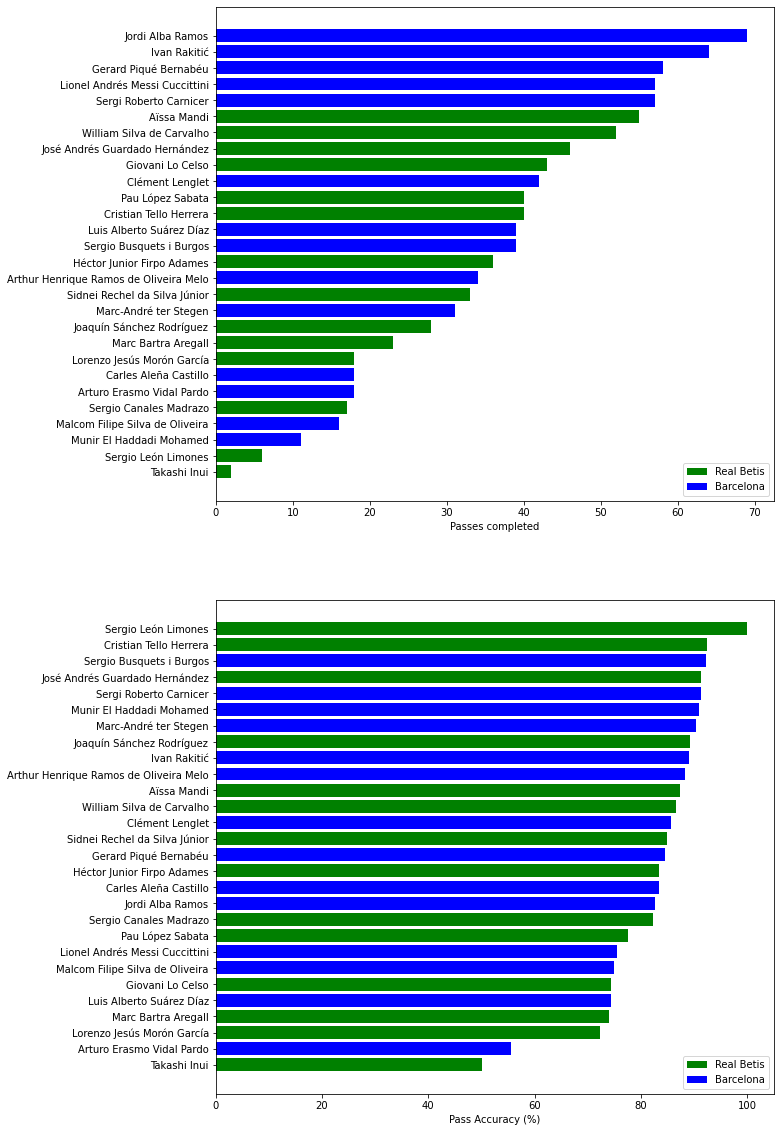

In [19]:
plt.figure(figsize=(10,20))
plt.subplot(211)
ax = plt.barh(y = completed_passes_counts['player'], width=completed_passes_counts['outcome'], color=colors1)
plt.legend(ax[1:3], ('Real Betis','Barcelona'), loc='best')
plt.xlabel("Passes completed")

plt.subplot(212)
ax = plt.barh(y = pass_accuracy['player'], width=pass_accuracy['outcome'], color=colors2)
plt.legend(ax[0:2], ('Real Betis','Barcelona'), loc='best')
plt.xlabel("Pass Accuracy (%)")
plt.show()

In [20]:
mean_values = pass_df.groupby(['player','team'])[['x','y','end_x','end_y','length','angle']].mean().reset_index()

In [21]:
mean_values['Nb_passes'] = pass_df.groupby('player')['outcome'].count().values

In [22]:
mean_values_barca = mean_values[mean_values['team'] == 'Barcelona'].reset_index()
mean_values_betis = mean_values[mean_values['team'] == 'Real Betis'].reset_index()

In [23]:
mean_values_barca = mean_values_barca.merge(barca_lineup[['player','jersey_number']], on='player')
mean_values_betis = mean_values_betis.merge(betis_lineup[['player','jersey_number']], on='player')

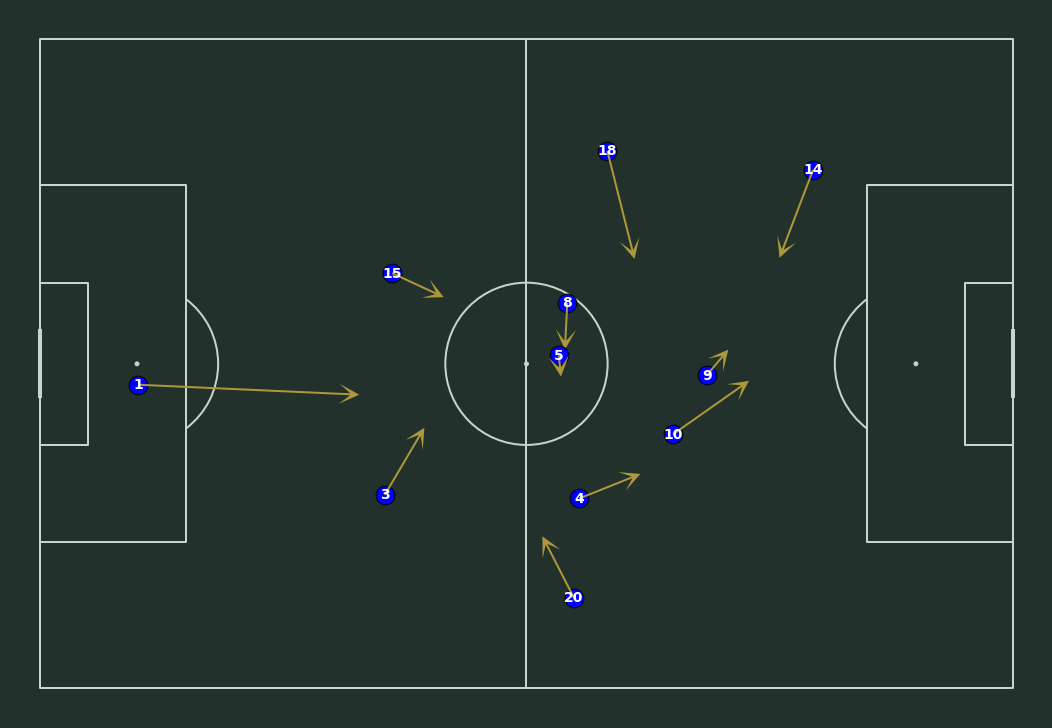

In [24]:
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(16, 10), constrained_layout=True, tight_layout=False)
fig.set_facecolor('#22312b')

for i in range(len(mean_values_barca)):
    
    plt.scatter(mean_values_barca.loc[i].x,mean_values_barca.loc[i].y, c='b', s=350, edgecolors='black')
    plt.annotate(mean_values_barca.loc[i]['jersey_number'],xy=(mean_values_barca.loc[i]['x'],mean_values_barca.loc[i]['y']), 
                 c='white', va='center',ha='center', size=14, weight='bold')
    
    pitch.arrows(mean_values_barca.loc[i]['x'],mean_values_barca.loc[i].y,
                 mean_values_barca.loc[i].end_x,mean_values_barca.loc[i].end_y, width=2,
                 headwidth=10, headlength=10, color='#ad993c', ax=ax)

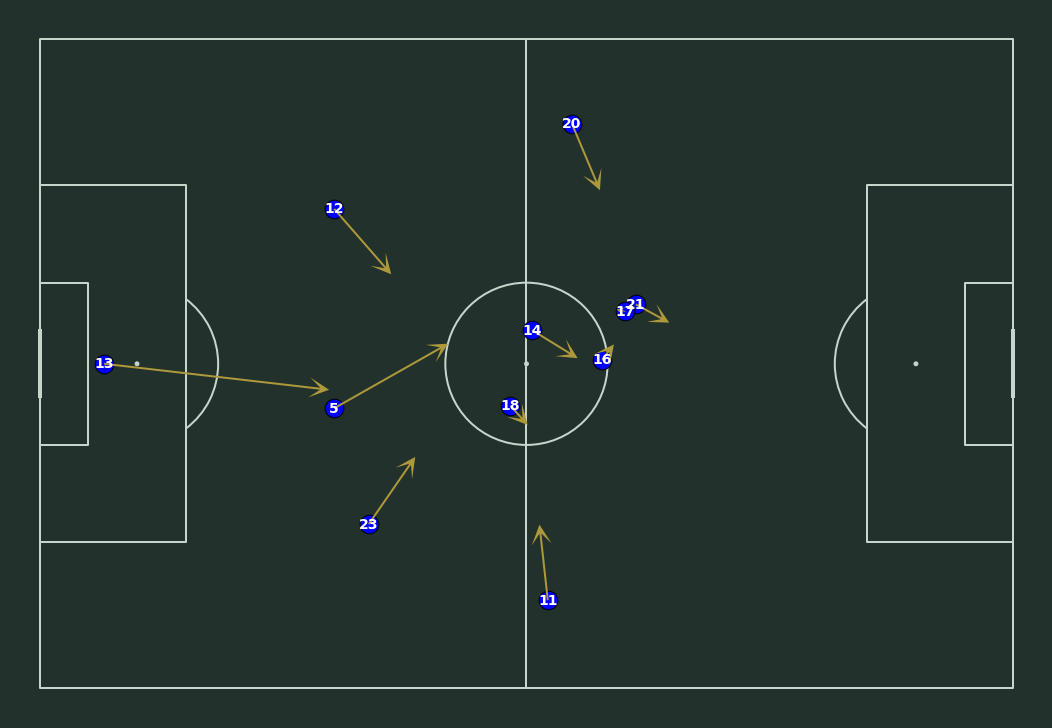

In [25]:
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(16, 10), constrained_layout=True, tight_layout=False)
fig.set_facecolor('#22312b')

for i in range(len(mean_values_betis)):
    
    plt.scatter(mean_values_betis.loc[i].x,mean_values_betis.loc[i].y, c='b', s=350, edgecolors='black')
    plt.annotate(mean_values_betis.loc[i]['jersey_number'],xy=(mean_values_betis.loc[i]['x'],mean_values_betis.loc[i]['y']), 
                 c='white', va='center',ha='center', size=14, weight='bold')
    
    pitch.arrows(mean_values_betis.loc[i]['x'],mean_values_betis.loc[i].y,
                 mean_values_betis.loc[i].end_x,mean_values_betis.loc[i].end_y, width=2,
                 headwidth=10, headlength=10, color='#ad993c', ax=ax)


For Barcelona, we can see that Messi, althought he plays high on the field, seems to be the player that plays the most dangerous passes. FCB's players are also much higher on the field than the Real Betis'. 

### Passing network

In [26]:
most_passes_exchanged = pass_df.groupby(['player','recipient'])['outcome'].count().reset_index().sort_values(ascending=False, by='outcome').reset_index()

In [27]:
most_passes_exchanged.head()

,index,player,recipient,outcome
0,99,Ivan Rakitić,Sergi Roberto Carnicer,16
1,210,Sergi Roberto Carnicer,Ivan Rakitić,15
2,209,Sergi Roberto Carnicer,Gerard Piqué Bernabéu,14
3,95,Ivan Rakitić,Lionel Andrés Messi Cuccittini,12
4,44,Cristian Tello Herrera,Aïssa Mandi,12


In the "most_passes_exchanged" dataset, we have the occurences of exchanged passes and the recipient for each player. We also have their average position during the game when making passes.

In [28]:
x = []
y = []
x_end = []
y_end = []

for i in range(len(most_passes_exchanged)):
    
    player = most_passes_exchanged.loc[i]['player']
    recipient = most_passes_exchanged.loc[i]['recipient']
    
    x_pos = mean_values[mean_values['player'] == player]['x'].values
    y_pos = mean_values[mean_values['player'] == player]['y'].values
    
    x_end_pos = mean_values[mean_values['player'] == recipient]['x'].values
    y_end_pos = mean_values[mean_values['player'] == recipient]['y'].values
    
    x.append(x_pos)
    y.append(y_pos)
    x_end.append(x_end_pos)
    y_end.append(y_end_pos)
    

most_passes_exchanged['x'] = x
most_passes_exchanged['y'] = y
most_passes_exchanged['x_end'] = x_end 
most_passes_exchanged['y_end'] = y_end

In [29]:
most_passes_exchanged = most_passes_exchanged[most_passes_exchanged['recipient'] != 'No recipient'] # We do not consider missed passes

In [30]:
most_passes_exchanged = most_passes_exchanged.merge(mean_values[['player','team']], on='player')

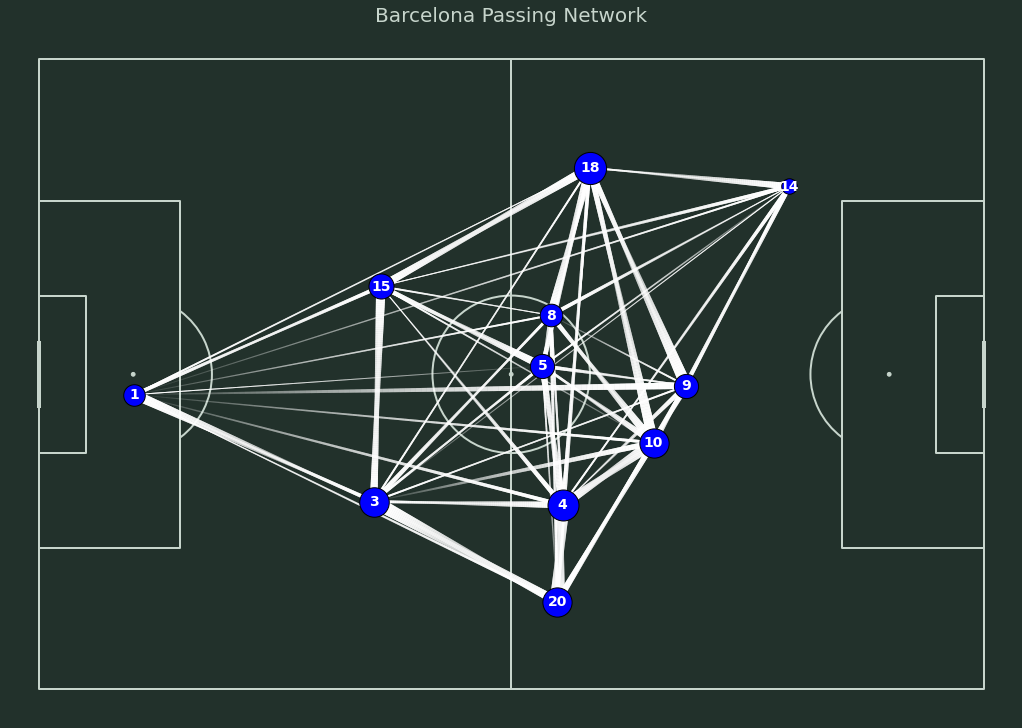

In [31]:
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(16, 10), constrained_layout=True, tight_layout=False)
fig.set_facecolor('#22312b')

subs = ['Carles Aleña Castillo','Munir El Haddadi Mohamed','Arturo Erasmo Vidal Pardo'] 
# We do not want to consider players that came off the bench in the graph

data_barca = most_passes_exchanged[most_passes_exchanged['team'] == 'Barcelona']
for k in subs:
    
    data_barca = data_barca.loc[data_barca['player'] != k].loc[data_barca['recipient'] !=k].reset_index(drop='index')

for i in range(len(data_barca)):
    
    
    pitch.lines(data_barca.loc[i]['x'],data_barca.loc[i]['y'],
                 data_barca.loc[i]['x_end'],data_barca.loc[i]['y_end'],lw=data_barca.loc[i]['outcome']/1.05,
                comet=True, transparent=True,
                color='w',zorder=1,ax=ax)

for i in range(len(mean_values_barca)):
    
    plt.scatter(mean_values_barca.loc[i].x,mean_values_barca.loc[i].y, c='b', 
                s=15*mean_values_barca.loc[i]['Nb_passes'], edgecolors='black')# We draw the position of each player.
                                                                            # The more passes completed, the bigger the points will be
    
    plt.annotate(mean_values_barca.loc[i]['jersey_number'],xy=(mean_values_barca.loc[i]['x'],mean_values_barca.loc[i]['y']), 
                 c='white', va='center',ha='center', size=14, weight='bold')
                
plt.title('Barcelona Passing Network', fontsize=20,color='#c7d5cc')
plt.show()

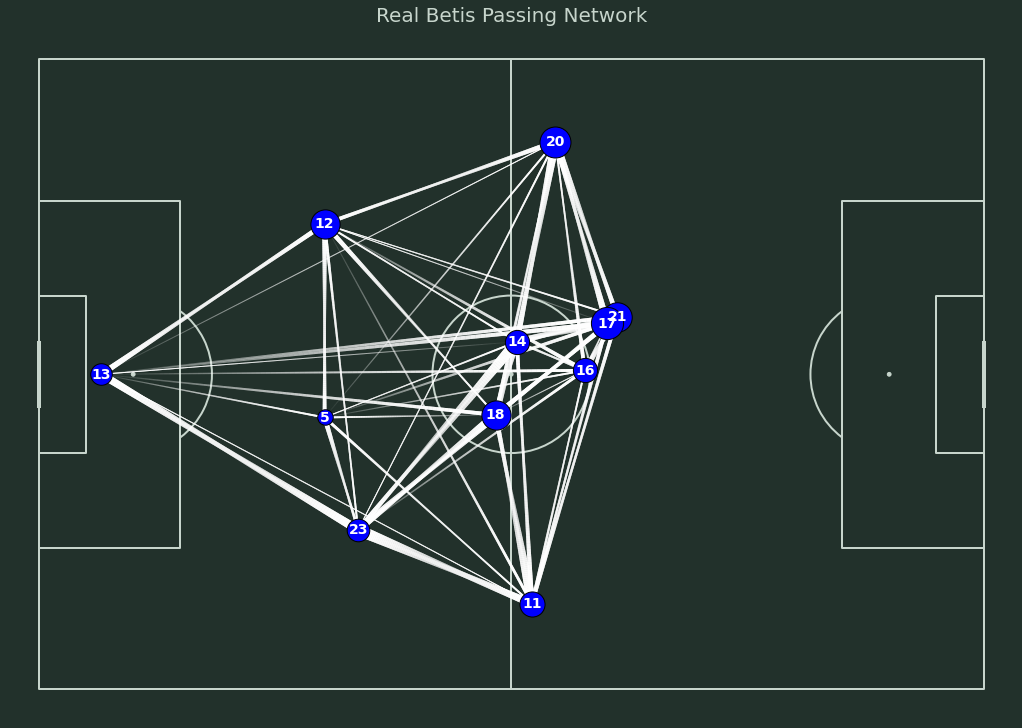

In [32]:
pitch = Pitch(pitch_type='statsbomb', pitch_color='#22312b', line_color='#c7d5cc')
fig, ax = pitch.draw(figsize=(16, 10), constrained_layout=True, tight_layout=False)
fig.set_facecolor('#22312b')

data_betis = most_passes_exchanged[most_passes_exchanged['team'] == 'Real Betis']
subs = ['Sergio Canales Madrazo','Takashi Inui','Sergio León Limones']
# We do not want to consider players that came off the bench in the graph

for k in subs:
    
    data_betis = data_betis.loc[data_betis['player'] != k].loc[data_betis['recipient'] !=k].loc[data_betis['team'] == 'Real Betis'].reset_index(drop='index')
    
for i in range(len(data_betis)):
    
    pitch.lines(data_betis.loc[i]['x'],data_betis.loc[i]['y'],
                 data_betis.loc[i]['x_end'],data_betis.loc[i]['y_end'],lw=data_betis.loc[i]['outcome']/1.05,
                comet=True, transparent=True,
                color='w',zorder=1,ax=ax) # We draw all the passes exchanged. The more occurences between 2 players, the bigger the line.
for i in range(len(mean_values_betis)):
    
    plt.scatter(mean_values_betis.loc[i].x,mean_values_betis.loc[i].y, c='b', 
                s=15*mean_values_barca.loc[i]['Nb_passes'], edgecolors='black') # We draw the position of each player.
                                                                            # The more passes completed, the bigger the points will be
    
    
    plt.annotate(mean_values_betis.loc[i]['jersey_number'],xy=(mean_values_betis.loc[i]['x'],mean_values_betis.loc[i]['y']), 
                 c='white', va='center',ha='center', size=14, weight='bold')

plt.title('Real Betis Passing Network', fontsize=20,color='#c7d5cc')
plt.show()

Looking at the 2 graphs, we can notice a few points:

- Barcelona's CB's passed to their Wing Backs most of the time, playing laterally, which is kind of the norm in the Barca style. 
- We can see the Messi-Alba connection although they do not play on the same side of the field.
- Barca seems to play more on the right side of the field.
- A lot of passes exchanged between Betis players playing in the middle of the field. 
- Betis defenders did not touch many balls compared to Barcelona's. 
